Credits/Course URL - https://www.udemy.com/course/the-ultimate-beginners-guide-to-natural-language-processing/

In [24]:
import nltk
import spacy
import en_core_web_sm
from goose3 import Goose
import matplotlib.pyplot as plt

In [3]:
goose_obj = Goose()
url = 'https://en.wikipedia.org/wiki/Natural_language_processing'
article = goose_obj.extract(url)

In [4]:
article.title

'Natural language processing - Wikipedia'

In [5]:
article.cleaned_text

'Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\n\nNatural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence. The proposed test includes a task that involves the automated interpre

In [6]:
article.authors

[]

In [7]:
article.links

['/wiki/Language_processing_in_the_brain',
 '/wiki/File:Automated_online_assistant.png',
 '/wiki/File:Automated_online_assistant.png',
 '#cite_note-Kongthon-1',
 '/wiki/Automated_online_assistant',
 '/wiki/Customer_service',
 '/wiki/Interdisciplinary',
 '/wiki/Linguistics',
 '/wiki/Computer_science',
 '/wiki/Artificial_intelligence',
 '/wiki/Natural_language',
 '/wiki/Context_(language_use)',
 '/wiki/Speech_recognition',
 '/wiki/Natural-language_understanding',
 '/wiki/Natural_language_generation',
 '/w/index.php?title=Natural_language_processing&action=edit&section=1',
 '/wiki/History_of_natural_language_processing',
 '/wiki/Alan_Turing',
 '/wiki/Computing_Machinery_and_Intelligence',
 '/wiki/Turing_test',
 '/w/index.php?title=Natural_language_processing&action=edit&section=2',
 '/wiki/John_Searle',
 '/wiki/Chinese_room',
 '/wiki/Georgetown-IBM_experiment',
 '/wiki/Automatic_translation',
 '#cite_note-2',
 '/wiki/ALPAC',
 '/wiki/Statistical_machine_translation',
 '/wiki/SHRDLU',
 '/wi

### Named Entity Recognition

In [9]:
nlp = spacy.load('en_core_web_sm')

In [10]:
nlp

In [11]:
document = nlp(article.cleaned_text)

In [12]:
spacy.displacy.render(document, style='ent', jupyter=True)

In [15]:
for entity in document.ents:
    if entity.label_ == 'PERSON':
        print(entity.text)

Alan Turing
John Searle's
Joseph Weizenbaum
SAM
Wilensky
QUALM
Lehnert
Lehnert
Lesk
Centering Theory[4]
Jabberwacky
Chomskyan
Markov
George Lakoff
Lakoff


In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luvkush\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
tokens = nltk.tokenize.word_tokenize(article.cleaned_text)

In [19]:
tokens

['Natural',
 'language',
 'processing',
 '(',
 'NLP',
 ')',
 'is',
 'an',
 'interdisciplinary',
 'subfield',
 'of',
 'linguistics',
 ',',
 'computer',
 'science',
 ',',
 'and',
 'artificial',
 'intelligence',
 'concerned',
 'with',
 'the',
 'interactions',
 'between',
 'computers',
 'and',
 'human',
 'language',
 ',',
 'in',
 'particular',
 'how',
 'to',
 'program',
 'computers',
 'to',
 'process',
 'and',
 'analyze',
 'large',
 'amounts',
 'of',
 'natural',
 'language',
 'data',
 '.',
 'The',
 'goal',
 'is',
 'a',
 'computer',
 'capable',
 'of',
 '``',
 'understanding',
 "''",
 'the',
 'contents',
 'of',
 'documents',
 ',',
 'including',
 'the',
 'contextual',
 'nuances',
 'of',
 'the',
 'language',
 'within',
 'them',
 '.',
 'The',
 'technology',
 'can',
 'then',
 'accurately',
 'extract',
 'information',
 'and',
 'insights',
 'contained',
 'in',
 'the',
 'documents',
 'as',
 'well',
 'as',
 'categorize',
 'and',
 'organize',
 'the',
 'documents',
 'themselves',
 '.',
 'Natural',
 'l

In [20]:
len(tokens)

2804

In [22]:
freq = nltk.FreqDist(tokens)
most_common = freq.most_common(10)
most_common

[(',', 177),
 ('the', 119),
 ('of', 111),
 ('.', 87),
 ('and', 49),
 ('a', 46),
 ('in', 45),
 ('to', 45),
 ('(', 42),
 (')', 42)]

### Word Cloud

In [23]:
from wordcloud import WordCloud
wc = WordCloud()
wc = wc.generate(article.cleaned_text)

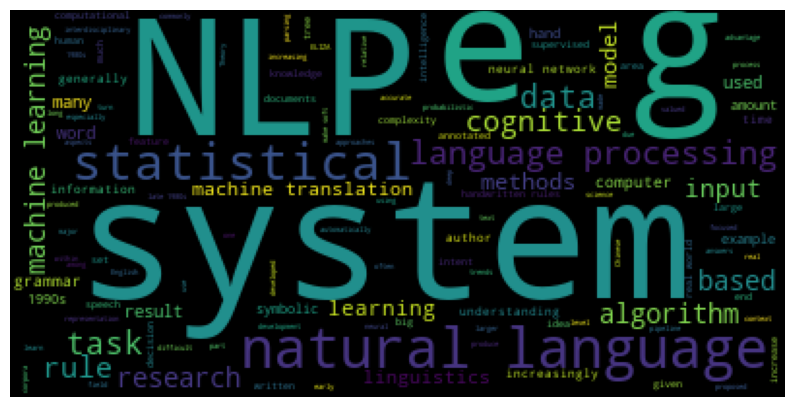

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off');

### Preprocessing the text

In [48]:
def preprocess(sentence):
    
    sentence = sentence.lower()
    sentence = sentence.replace('.', '')
    sentence = sentence.replace('[', '')
    sentence = sentence.replace(']', '')
    
    tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space)]
    
    tokens = ' '.join(tokens)
    return tokens

In [49]:
cleaned_article = preprocess(article.cleaned_text)

In [50]:
len(article.cleaned_text), len(cleaned_article)

(15970, 11190)

In [52]:
toks = nltk.tokenize.word_tokenize(cleaned_article)

freq = nltk.FreqDist(toks)
most_common = freq.most_common(15)
most_common

[('language', 29),
 ('learning', 23),
 ('nlp', 22),
 ('eg', 22),
 ('machine', 22),
 ('natural', 20),
 ('systems', 20),
 ('rules', 16),
 ('statistical', 16),
 ('processing', 15),
 ('data', 15),
 ('cognitive', 14),
 ('research', 13),
 ('based', 13),
 ('input', 12)]